In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/participantstaska/Participant2.csv
/kaggle/input/participantstaska/Participant17.csv
/kaggle/input/participantstaska/Participant22.csv
/kaggle/input/participantstaska/Participant18.csv
/kaggle/input/participantstaska/Participant5.csv
/kaggle/input/participantstaska/Participant3.csv
/kaggle/input/participantstaska/Participant25.csv
/kaggle/input/participantstaska/Participant4.csv
/kaggle/input/participantstaska/Participant7.csv
/kaggle/input/participantstaska/Participant15.csv
/kaggle/input/participantstaska/Participant9.csv
/kaggle/input/participantstaska/Participant14.csv
/kaggle/input/participantstaska/Participant30.csv
/kaggle/input/participantstaska/Participant20.csv
/kaggle/input/participantstaska/Participant10.csv
/kaggle/input/participantstaska/Participant27.csv
/kaggle/input/participantstaska/Participant13.csv
/kaggle/input/participantstaska/Participant1.csv
/kaggle/input/participantstaska/Participant29.csv
/kaggle/input/participantstaska/Participant19.csv
/kaggle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

# Inputting the datasets
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [3]:
DF_listA= list()
DF_listB = list()

In [4]:
#Task A
for i in range (0, 30):
    DF_listA.insert(i, pd.read_csv('../input/participantstaska/Participant'+str(i+1)+'.csv') )

#Task B
for i in range (0, 30):
    DF_listB.insert(i, pd.read_csv('../input/participantstaskb/Participant'+str(i+1)+'.csv') )

In [5]:
training_subjects = np.array([1, 4, 5, 7, 9, 10, 11, 14, 2, 16, 17, 19, 21, 22, 23, 24, 26, 27, 29, 30])
validation_subjects = np.array([3, 6, 12, 20, 25])
test_subjects = np.array([15,8,13,18,28])

In [6]:
#Task A
DF_train = list()
DF_validation = list()
DF_test = list()

#Task B
DF_trainB = list()
DF_validationB = list()
DF_testB = list()
k=0

In [7]:
#Task A
k=0

for i in training_subjects:
    DF_train.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0

for i in training_subjects:
    DF_trainB.insert(k, DF_listB[i-1])
    k=k+1

In [8]:
#Task A
k=0
for i in validation_subjects:
    DF_validation.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in validation_subjects:
    DF_validationB.insert(k, DF_listB[i-1])
    k=k+1

In [9]:
#Task A
k=0
for i in test_subjects:
    DF_test.insert(k, DF_listA[i-1])
    k=k+1

#Task B
k=0
for i in test_subjects:
    DF_testB.insert(k, DF_listB[i-1])
    k=k+1

In [10]:
#Task A
trainData = pd.concat(DF_train, ignore_index=True)
validData = pd.concat(DF_validation, ignore_index=True)
testData = pd.concat (DF_test, ignore_index=True)

X_train = trainData.drop(['event'], axis=1)
y_train = pd.DataFrame(trainData.iloc[:,-1])

X_valid = validData.drop(['event'], axis=1)
y_valid = pd.DataFrame(validData.iloc[:,-1])

X_test = testData.drop(['event'], axis=1)
y_test = pd.DataFrame(testData.iloc[:,-1])



#Task B
trainDataB = pd.concat(DF_trainB, ignore_index=True)
validDataB = pd.concat(DF_validationB, ignore_index=True)
testDataB = pd.concat (DF_testB, ignore_index=True)

X_trainB = trainDataB.drop(['event'], axis=1)
y_trainB = pd.DataFrame(trainDataB.iloc[:,-1])

X_validB = validDataB.drop(['event'], axis=1)
y_validB = pd.DataFrame(validDataB.iloc[:,-1])

X_testB = testDataB.drop(['event'], axis=1)
y_testB = pd.DataFrame(testDataB.iloc[:,-1])

## Merging task A and task B 

In [11]:
DF_listFull=list()

In [12]:
for i in range (0, 30):
    frames = [DF_listA[i], DF_listB[i]]
    result = pd.concat(frames)
    DF_listFull.insert(i, result)

    

In [13]:
DF_trainFull = list()
DF_validationFull = list()
DF_testFull = list()
k=0

In [14]:
for i in training_subjects:
    DF_trainFull.insert(k, DF_listFull[i-1])
    k=k+1

In [15]:
k=0
for i in validation_subjects:
    DF_validationFull.insert(k, DF_listFull[i-1])
    k=k+1

In [16]:
k=0
for i in test_subjects:
    DF_testFull.insert(k, DF_listFull[i-1])
    k=k+1

In [17]:
trainDataFull = pd.concat(DF_trainFull, ignore_index=True)
validDataFull = pd.concat(DF_validationFull, ignore_index=True)
testDataFull = pd.concat (DF_testFull, ignore_index=True)

X_trainFull = trainDataFull.drop(['event'], axis=1)
y_trainFull = pd.DataFrame(trainDataFull.iloc[:,-1])

X_validFull = validDataFull.drop(['event'], axis=1)
y_validFull = pd.DataFrame(validDataFull.iloc[:,-1])

X_testFull = testDataFull.drop(['event'], axis=1)
y_testFull = pd.DataFrame(testDataFull.iloc[:,-1])


# Task A 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Standardization - Subjectwise
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Standardize the data by subject

In [18]:
from sklearn.preprocessing import StandardScaler
DF_listAstd = list()

In [19]:
DF_listAstd.clear()

In [20]:
for i in range (0, 30):
    DF_listAstd.insert (i, DF_listA[i].drop(['event'], axis=1))

In [21]:
names= DF_listAstd[1].columns

In [22]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listAstd[i]=scale.fit_transform(DF_listAstd[i])
    DF_listAstd[i]=pd.DataFrame(DF_listAstd[i], columns=names)

In [23]:
DF_train_std = list()
DF_valid_std = list()
DF_test_std = list()

In [24]:
k=0

for i in training_subjects:
    DF_train_std.insert(k, DF_listAstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_valid_std.insert(k, DF_listAstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_test_std.insert(k, DF_listAstd[i-1])
    k=k+1
   


In [25]:
X_train_std = pd.concat(DF_train_std, ignore_index=True)
X_valid_std = pd.concat(DF_valid_std, ignore_index=True)
X_test_std = pd.concat (DF_test_std, ignore_index=True)

In [26]:
X_test_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.849015,-0.962069,3.103113,5.453010,-2.053553,2.142066,-3.103113,-4.376918,-0.769908,-0.056617,...,0.027124,-1.990522,-1.209660,-0.446172,-0.361775,-0.361775,-1.390700,-1.390700,-0.343081,-0.639459
1,-0.849037,-0.961241,3.109000,5.482114,-2.075031,2.140610,-3.109000,-4.399432,-0.778470,-0.053945,...,-0.004436,-2.037631,-1.209660,-0.446172,-0.361767,-0.361767,-1.516002,-1.516002,-0.552457,-0.639185
2,-0.827607,-0.910432,3.998969,0.393562,0.864878,0.708649,-3.998969,-0.224417,-0.281094,-0.047046,...,-0.028708,-1.623079,-1.086011,-2.662393,-0.359740,-0.359740,1.324983,1.324983,3.189055,-0.639564
3,-0.803658,-0.854009,2.430907,0.292217,0.939463,-0.025070,-2.430907,-0.185868,-0.304297,0.036364,...,0.110085,-1.194907,-1.086011,-2.662393,-0.357702,-0.357702,1.473463,1.473463,2.516232,-0.639028
4,-0.770065,-0.793239,1.544201,-0.065738,0.618261,-0.457433,-1.544201,0.102377,-0.145343,0.062060,...,0.153167,-0.591126,-0.344118,-2.662393,-0.356053,-0.356053,1.167521,1.167521,1.361316,-0.640058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,-0.471728,-0.470952,0.154435,-0.206256,1.258822,-0.471602,-0.154435,0.220897,-1.962109,0.659903,...,-0.131079,-0.505206,-0.794060,-0.629221,-0.158183,-0.158183,-0.006787,-0.006787,0.906727,-0.336988
19526,-0.462767,-0.463877,0.762929,-0.574726,1.301156,-0.441486,-0.762929,0.579999,-1.860787,0.625795,...,0.110741,-0.441877,-0.745581,-0.629221,-0.158322,-0.158322,-0.020767,-0.020767,0.760620,-0.331746
19527,-0.441191,-0.452436,0.345630,-0.503384,1.348803,-0.295361,-0.345630,0.513254,-1.993949,0.526290,...,-0.190589,-0.472734,-0.745581,-0.411459,-0.157578,-0.157578,-0.119863,-0.119863,0.614114,-0.285345
19528,-0.436872,-0.443049,0.533419,-0.714604,1.282612,-0.265250,-0.533419,0.718294,-1.749829,0.473827,...,0.061150,-0.472903,-0.697102,-0.411459,-0.157029,-0.157029,-0.170081,-0.170081,0.511084,-0.244395


<br>

## Training The Model Standardization

### Dummy Classifier - Standardization

In [27]:
dclf_std = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_std.fit(X_train_std, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [28]:
score_dummy_std = dclf_std.score(X_valid_std, y_valid)
y_pred_dummy_std = dclf_std.predict(X_valid_std)
f1_dummy_std=f1_score(y_valid, y_pred_dummy_std, average='macro')
print ('Accuracy: '+str(score_dummy_std*100)+' %')
print ('F1-Score: '+str(f1_dummy_std))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


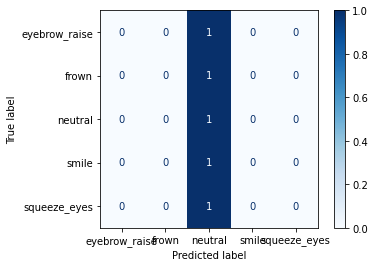

In [29]:
plot_confusion_matrix(estimator=dclf_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Standardization

In [30]:
clf_tree_std = tree.DecisionTreeClassifier()
clf_tree_std.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [31]:
score_tree_std = clf_tree_std.score(X_valid_std, y_valid)
y_pred_tree_std = clf_tree_std.predict(X_valid_std)
f1_tree_std=f1_score(y_valid, y_pred_tree_std, average='macro')
print ('Accuracy: '+str(score_tree_std*100)+' %')
print ('F1-Score: '+str(f1_tree_std))

Accuracy: 73.10362429811128 %
F1-Score: 0.601835572710764


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


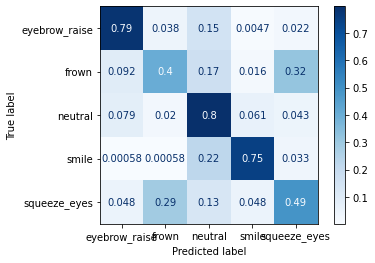

In [32]:
plot_confusion_matrix(estimator=clf_tree_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [33]:
score_tree_std = clf_tree_std.score(X_test_std, y_test)
y_pred_tree_std = clf_tree_std.predict(X_test_std)
f1_tree_std=f1_score(y_test, y_pred_tree_std, average='macro')
print ('Accuracy: '+str(score_tree_std*100)+' %')
print ('F1-Score: '+str(f1_tree_std))

Accuracy: 75.41218637992831 %
F1-Score: 0.642975299448602


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


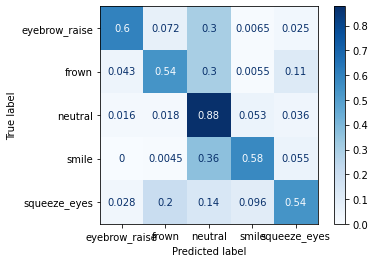

In [34]:
plot_confusion_matrix(estimator=clf_tree_std, X=X_test_std, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Standardization

In [35]:
clf_rf_std = RandomForestClassifier(random_state=42)
clf_rf_std.fit(X_train_std, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [36]:
y_pred_rf_std = clf_rf_std.predict(X_valid_std)
score_rf_std = clf_rf_std.score(X_valid_std, y_valid)
f1_rf_std = f1_score(y_valid, y_pred_rf_std, average='macro')
print ('Accuracy: '+str(score_rf_std*100)+' %')
print ('F1-Score: '+str(f1_rf_std))

Accuracy: 87.10056151097498 %
F1-Score: 0.7748351159229652


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


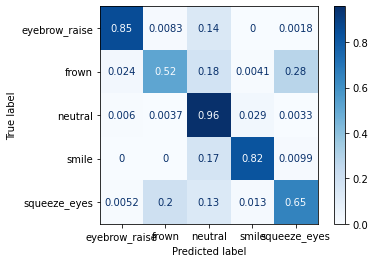

In [37]:
plot_confusion_matrix(estimator=clf_rf_std, X=X_valid_std, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [38]:
y_pred_rf_std = clf_rf_std.predict(X_test_std)
score_rf_std = clf_rf_std.score(X_test_std, y_test)
f1_rf_std = f1_score(y_test, y_pred_rf_std, average='macro')
print ('Accuracy: '+str(score_rf_std*100)+' %')
print ('F1-Score: '+str(f1_rf_std))

Accuracy: 87.62416794674859 %
F1-Score: 0.8248460069210772


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


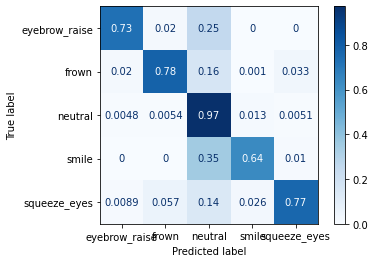

In [39]:
plot_confusion_matrix(estimator=clf_rf_std, X=X_test_std, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Standardization

In [40]:
le = LabelEncoder()
y_trainXGB = le.fit_transform(y_train)
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
xgb_std = XGBClassifier(n_estimators=100)
xgb_std.fit(X_train_std, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [42]:
y_predXGB_std = xgb_std.predict(X_valid_std)
predictions_std = [round(value) for value in y_predXGB_std]
score_xgb_std = accuracy_score(y_validXGB, predictions_std)
f1_xgb_std = f1_score(y_validXGB, predictions_std, average='macro')
print ('Accuracy: '+str(score_xgb_std*100)+' %')
print ('F1-Score: '+str(f1_xgb_std))

Accuracy: 87.20265441551813 %
F1-Score: 0.7766927125688805


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


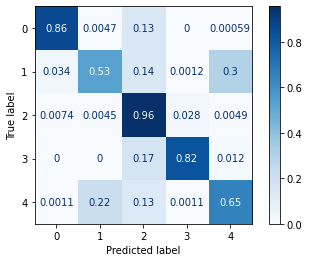

In [43]:
plot_confusion_matrix(estimator=xgb_std, X=X_valid_std, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [44]:
y_predXGB_std = xgb_std.predict(X_test_std)
predictions_std = [round(value) for value in y_predXGB_std]
score_xgb_std = accuracy_score(y_testXGB, predictions_std)
f1_xgb_std = f1_score(y_testXGB, predictions_std, average='macro')
print ('Accuracy: '+str(score_xgb_std*100)+' %')
print ('F1-Score: '+str(f1_xgb_std))

Accuracy: 87.357910906298 %
F1-Score: 0.8193471252687855


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


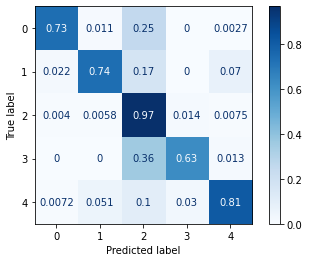

In [45]:
plot_confusion_matrix(estimator=xgb_std, X=X_test_std, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

# Normalization - Subjectwise 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Normalizing the data by subject

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DF_listAnorm = list()

In [47]:
for i in range (0, 30):
    DF_listAnorm.insert (i, DF_listA[i].drop(['event'], axis=1))

In [48]:
for i in range (0, 30):
    DF_listAnorm[i]=scaler.fit_transform(DF_listAnorm[i])
    DF_listAnorm[i]=pd.DataFrame(DF_listAnorm[i], columns=names)

In [49]:
DF_train_norm = list()
DF_valid_norm = list()
DF_test_norm = list()

In [50]:
k=0

for i in training_subjects:
    DF_train_norm.insert(k, DF_listAnorm[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_valid_norm.insert(k, DF_listAnorm[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_test_norm.insert(k, DF_listAnorm[i-1])
    k=k+1
   


In [51]:
X_train_norm = pd.concat(DF_train_norm, ignore_index=True)
X_valid_norm = pd.concat(DF_valid_norm, ignore_index=True)
X_test_norm = pd.concat (DF_test_norm, ignore_index=True)

In [52]:
X_test_norm

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.009419,0.000000,0.614631,0.348436,0.771577,0.410968,0.385369,0.756034,0.967106,0.008346,...,0.399056,0.232458,0.294479,0.193548,0.000004,0.000004,0.060344,0.060344,0.089521,0.007600
1,0.009415,0.000134,0.614958,0.349725,0.770615,0.410894,0.385042,0.755181,0.966889,0.008413,...,0.397720,0.227292,0.294479,0.193548,0.000005,0.000005,0.044882,0.044882,0.076164,0.007624
2,0.012686,0.008339,0.664379,0.124417,0.902349,0.338671,0.335621,0.913250,0.979483,0.008586,...,0.396693,0.272750,0.306748,0.000000,0.000154,0.000154,0.395472,0.395472,0.314867,0.007590
3,0.016341,0.017451,0.577303,0.119929,0.905691,0.301664,0.422697,0.914709,0.978895,0.010676,...,0.402567,0.319702,0.306748,0.000000,0.000305,0.000305,0.413795,0.413795,0.271942,0.007638
4,0.021467,0.027264,0.528063,0.104080,0.891298,0.279857,0.471937,0.925622,0.982920,0.011320,...,0.404390,0.385910,0.380368,0.000000,0.000426,0.000426,0.376041,0.376041,0.198260,0.007547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,0.029753,0.038201,0.405920,0.523282,0.647730,0.386965,0.594080,0.630765,0.278478,0.815193,...,0.449580,0.284764,0.254032,0.196787,0.000362,0.000362,0.242807,0.242807,0.170903,0.007695
19526,0.030716,0.038949,0.431304,0.498331,0.653475,0.389788,0.568696,0.661947,0.286099,0.812687,...,0.455470,0.289855,0.258065,0.196787,0.000354,0.000354,0.241319,0.241319,0.165612,0.008101
19527,0.033034,0.040158,0.413896,0.503162,0.659941,0.403485,0.586104,0.656151,0.276084,0.805378,...,0.448130,0.287374,0.258065,0.224900,0.000395,0.000395,0.230771,0.230771,0.160307,0.011701
19528,0.033498,0.041151,0.421730,0.488859,0.650958,0.406307,0.578270,0.673955,0.294444,0.801524,...,0.454262,0.287361,0.262097,0.224900,0.000425,0.000425,0.225425,0.225425,0.156577,0.014877


<br>

## Training the model

### Dummy Classifier - Normalization

In [53]:
dclf_norm = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_norm.fit(X_train_norm, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [54]:
score_dummy_norm = dclf_norm.score(X_valid_norm, y_valid)
y_pred_dummy_norm = dclf_norm.predict(X_valid_norm)
f1_dummy_norm=f1_score(y_valid, y_pred_dummy_norm, average='macro')
print ('Accuracy: '+str(score_dummy_norm*100)+' %')
print ('F1-Score: '+str(f1_dummy_norm))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


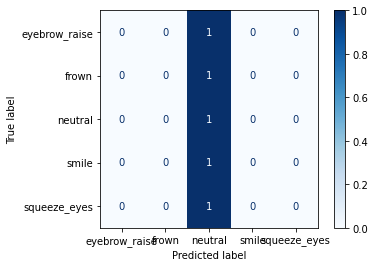

In [55]:
plot_confusion_matrix(estimator=dclf_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Normalization

In [56]:
clf_tree_norm = tree.DecisionTreeClassifier()
clf_tree_norm.fit(X_train_norm, y_train)

DecisionTreeClassifier()

In [57]:
score_tree_norm = clf_tree_norm.score(X_valid_norm, y_valid)
y_pred_tree_norm = clf_tree_norm.predict(X_valid_norm)
f1_tree_norm=f1_score(y_valid, y_pred_tree_norm, average='macro')
print ('Accuracy: '+str(score_tree_norm*100)+' %')
print ('F1-Score: '+str(f1_tree_norm))

Accuracy: 67.37621235324144 %
F1-Score: 0.5080318157891051


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


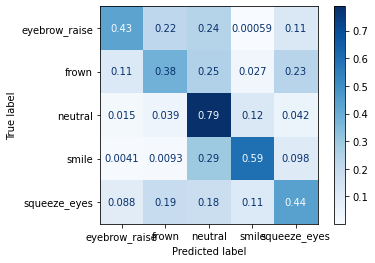

In [58]:
plot_confusion_matrix(estimator=clf_tree_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [59]:
score_tree_norm = clf_tree_norm.score(X_test_norm, y_test)
y_pred_tree_norm = clf_tree_norm.predict(X_test_norm)
f1_tree_norm=f1_score(y_test, y_pred_tree_norm, average='macro')
print ('Accuracy: '+str(score_tree_norm*100)+' %')
print ('F1-Score: '+str(f1_tree_norm))

Accuracy: 69.09882232462877 %
F1-Score: 0.5723431818045585


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


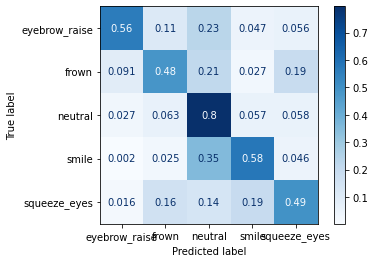

In [60]:
plot_confusion_matrix(estimator=clf_tree_norm, X=X_test_norm, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Normalization

In [61]:
clf_rf_norm = RandomForestClassifier(random_state=42)
clf_rf_norm.fit(X_train_norm, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [62]:
y_pred_rf_norm = clf_rf_norm.predict(X_valid_norm)
score_rf_norm = clf_rf_norm.score(X_valid_norm, y_valid)
f1_rf_norm = f1_score(y_valid, y_pred_rf_norm, average='macro')
print ('Accuracy: '+str(score_rf_norm*100)+' %')
print ('F1-Score: '+str(f1_rf_norm))

Accuracy: 85.69167942827973 %
F1-Score: 0.7406805915985951


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


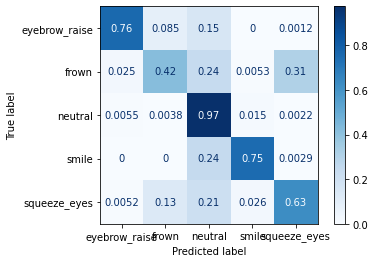

In [63]:
plot_confusion_matrix(estimator=clf_rf_norm, X=X_valid_norm, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [64]:
y_pred_rf_norm = clf_rf_norm.predict(X_test_norm)
score_rf_norm = clf_rf_norm.score(X_test_norm, y_test)
f1_rf_norm = f1_score(y_test, y_pred_rf_norm, average='macro')
print ('Accuracy: '+str(score_rf_norm*100)+' %')
print ('F1-Score: '+str(f1_rf_norm))

Accuracy: 85.0384024577573 %
F1-Score: 0.7778424815610405


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


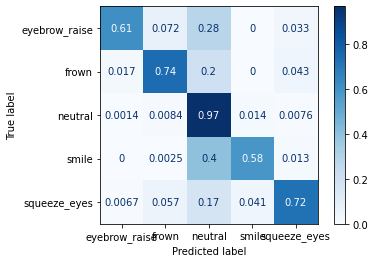

In [65]:
plot_confusion_matrix(estimator=clf_rf_norm, X=X_test_norm, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Normalization

In [66]:
le = LabelEncoder()
y_trainXGB = le.fit_transform(y_train)
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
xgb_norm = XGBClassifier(n_estimators=100)
xgb_norm.fit(X_train_norm, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [68]:
y_predXGB_norm = xgb_norm.predict(X_valid_norm)
predictions_norm = [round(value) for value in y_predXGB_norm]
score_xgb_norm = accuracy_score(y_validXGB, predictions_norm)
f1_xgb_norm = f1_score(y_validXGB, predictions_norm, average='macro')
print ('Accuracy: '+str(score_xgb_norm*100)+' %')
print ('F1-Score: '+str(f1_xgb_norm))

Accuracy: 85.71209800918837 %
F1-Score: 0.7428532626639445


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


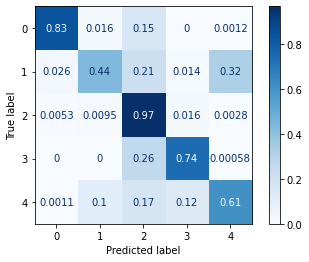

In [69]:
plot_confusion_matrix(estimator=xgb_norm, X=X_valid_norm, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [70]:
y_predXGB_norm = xgb_norm.predict(X_test_norm)
predictions_norm = [round(value) for value in y_predXGB_norm]
score_xgb_norm = accuracy_score(y_testXGB, predictions_norm)
f1_xgb_norm = f1_score(y_testXGB, predictions_norm, average='macro')
print ('Accuracy: '+str(score_xgb_norm*100)+' %')
print ('F1-Score: '+str(f1_xgb_norm))

Accuracy: 85.13568868407579 %
F1-Score: 0.779219895166477


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


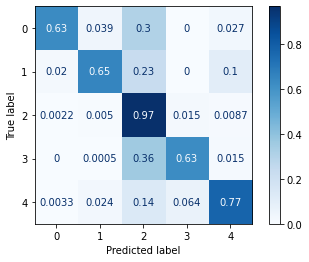

In [71]:
plot_confusion_matrix(estimator=xgb_norm, X=X_test_norm, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## Oversampling (SMOTE)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Performing the oversampling

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
y_train.value_counts()

event        
neutral          51773
smile             8342
frown             8016
eyebrow_raise     7587
squeeze_eyes      7192
dtype: int64

In [74]:
dict_os = {
  "eyebrow_raise": 48834,
  "frown": 44230,
  "neutral": 51773 ,
  "smile": 42374 ,
  "squeeze_eyes": 43423 
}

In [75]:
oversample = SMOTE(sampling_strategy=dict_os, k_neighbors=5)

In [76]:
X_train_us, y_train_us = oversample.fit_resample(X_train, y_train)

## Training the Model

### Dummy Classifier - Oversampling

In [77]:
dclf_us = DummyClassifier(strategy="most_frequent", random_state = 0)
dclf_us.fit(X_train_us, y_train_us)

DummyClassifier(random_state=0, strategy='most_frequent')

In [78]:
score_dummy_us = dclf_us.score(X_valid, y_valid)
y_pred_dummy_us = dclf_us.predict(X_valid)
f1_dummy_us=f1_score(y_valid, y_pred_dummy_us, average='macro')
print ('Accuracy: '+str(score_dummy_us*100)+' %')
print ('F1-Score: '+str(f1_dummy_us))

Accuracy: 65.02807554874937 %
F1-Score: 0.15761700021652386


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


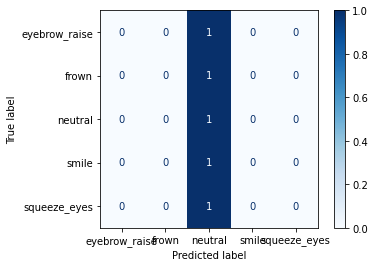

In [79]:
plot_confusion_matrix(estimator=dclf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

### Decision Tree - Oversampling

In [80]:
clf_tree_us = tree.DecisionTreeClassifier()
clf_tree_us.fit(X_train_us, y_train_us)

DecisionTreeClassifier()

In [81]:
score_tree_us = clf_tree_us.score(X_valid, y_valid)
y_pred_tree_us = clf_tree_us.predict(X_valid)
f1_tree_us=f1_score(y_valid, y_pred_tree_us, average='macro')
print ('Accuracy: '+str(score_tree_us*100)+' %')
print ('F1-Score: '+str(f1_tree_us))

Accuracy: 70.87799897907095 %
F1-Score: 0.5934192392630121


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


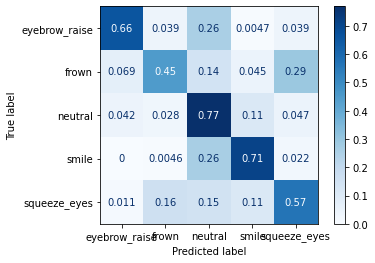

In [82]:
plot_confusion_matrix(estimator=clf_tree_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [83]:
score_tree_us = clf_tree_us.score(X_test, y_test)
y_pred_tree_us = clf_tree_us.predict(X_test)
f1_tree_us=f1_score(y_test, y_pred_tree_us, average='macro')
print ('Accuracy: '+str(score_tree_us*100)+' %')
print ('F1-Score: '+str(f1_tree_us))

Accuracy: 74.71070148489504 %
F1-Score: 0.6450814408712221


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


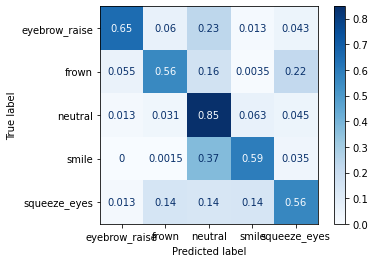

In [84]:
plot_confusion_matrix(estimator=clf_tree_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### Random Forest - Oversampling

In [85]:
clf_rf_us = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf_us.fit(X_train_us, y_train_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [86]:
y_pred_rf_us = clf_rf_us.predict(X_valid)
score_rf_us = clf_rf_us.score(X_valid, y_valid)
f1_rf_us = f1_score(y_valid, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 85.08933129147525 %
F1-Score: 0.7488130870796862


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


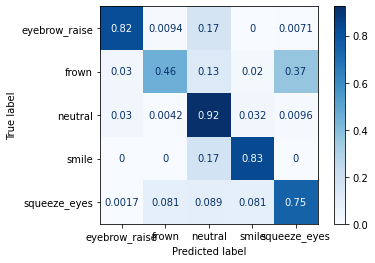

In [87]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_valid, y_true=y_valid,
                      normalize='true', cmap='Blues')

In [88]:
y_pred_rf_us = clf_rf_us.predict(X_test)
score_rf_us = clf_rf_us.score(X_test, y_test)
f1_rf_us = f1_score(y_test, y_pred_rf_us, average='macro')
print ('Accuracy: '+str(score_rf_us*100)+' %')
print ('F1-Score: '+str(f1_rf_us))

Accuracy: 86.34408602150538 %
F1-Score: 0.7998207958099479


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


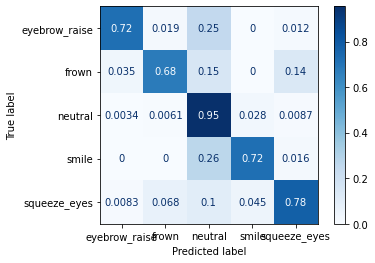

In [89]:
plot_confusion_matrix(estimator=clf_rf_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost - Oversampling

In [90]:
le = LabelEncoder()
y_trainXGB_us = le.fit_transform(y_train_us)
y_validXGB = le.fit_transform(y_valid)
y_testXGB = le.fit_transform(y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
xgb_us = XGBClassifier(n_estimators=100)
xgb_us.fit(X_train_us, y_trainXGB_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [92]:
y_predXGB_us = xgb_us.predict(X_valid)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_validXGB, predictions_us)
f1_xgb_us = f1_score(y_validXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 85.6253190403267 %
F1-Score: 0.7691671093308622


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


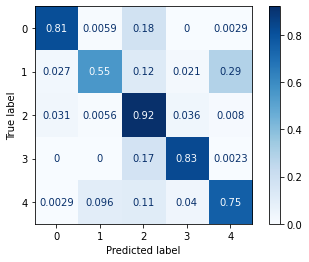

In [93]:
plot_confusion_matrix(estimator=xgb_us, X=X_valid, y_true=y_validXGB,
                      normalize='true', cmap='Blues')

In [94]:
y_predXGB_us = xgb_us.predict(X_test)
predictions_us = [round(value) for value in y_predXGB_us]
score_xgb_us = accuracy_score(y_testXGB, predictions_us)
f1_xgb_us = f1_score(y_testXGB, predictions_us, average='macro')
print ('Accuracy: '+str(score_xgb_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_us))

Accuracy: 85.49411162314388 %
F1-Score: 0.7924260204332688


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


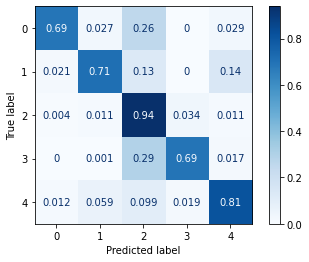

In [95]:
plot_confusion_matrix(estimator=xgb_us, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

<br>

<br>

# Task B
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<br>

# Standardization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Standardizing the data by subject

In [96]:
from sklearn.preprocessing import StandardScaler
DF_listBstd = list()

In [97]:
for i in range (0, 30):
    DF_listBstd.insert (i, DF_listB[i].drop(['event'], axis=1))

In [98]:
names= DF_listBstd[1].columns

In [99]:
scale= StandardScaler()
for i in range (0, 30):
    DF_listBstd[i]=scale.fit_transform(DF_listBstd[i])
    DF_listBstd[i]=pd.DataFrame(DF_listBstd[i], columns=names)

In [100]:
DF_trainB_std = list()
DF_validB_std = list()
DF_testB_std = list()

In [101]:
k=0

for i in training_subjects:
    DF_trainB_std.insert(k, DF_listBstd[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_validB_std.insert(k, DF_listBstd[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_testB_std.insert(k, DF_listBstd[i-1])
    k=k+1

In [102]:
X_trainB_std = pd.concat(DF_trainB_std, ignore_index=True)
X_validB_std = pd.concat(DF_validB_std, ignore_index=True)
X_testB_std = pd.concat (DF_testB_std, ignore_index=True)


In [103]:
X_testB_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.709083,-1.033585,5.675123,1.016567,3.857959,-1.371242,-5.675123,-0.610296,-2.093692,0.516947,...,-0.147971,-0.810236,-1.575651,-0.686389,-0.289253,-0.289253,-0.244831,-0.244831,0.413328,-0.194760
1,-0.709083,-1.033585,5.675123,1.016567,3.857959,-1.371242,-5.675123,-0.610296,-2.093692,0.516947,...,0.052794,-0.837027,-1.575651,-0.686389,-0.289255,-0.289255,-0.205259,-0.205259,0.491201,-0.192877
2,-0.730694,-0.985323,3.048626,2.031727,1.416432,1.036456,-3.048626,-1.635463,-0.990445,-0.019856,...,0.290294,-4.095331,-4.463759,-2.835691,-0.276221,-0.276221,-0.103152,-0.103152,13.448787,-0.192989
3,-0.756325,-0.941784,3.745908,0.717785,2.093207,0.658414,-3.745908,-0.482452,-1.169314,0.091412,...,0.132987,-4.106879,-4.523928,-2.835691,-0.270075,-0.270075,0.044976,0.044976,14.414322,-0.197698
4,-0.774379,-0.886359,2.867759,0.876267,1.718556,0.499864,-2.867759,-0.662097,-0.990969,0.080242,...,0.277913,-3.604170,-4.403590,-2.835691,-0.267205,-0.267205,0.524989,0.524989,11.323864,-0.235935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27375,-0.572384,-0.565975,0.617392,-0.583387,0.442670,-1.043809,-0.617392,0.581186,0.119205,0.211580,...,-0.013411,0.878351,0.051728,0.328402,-0.325784,-0.325784,1.517718,1.517718,1.184616,-0.501899
27376,-0.570458,-0.561308,0.876563,-0.626897,0.457890,-1.093698,-0.876563,0.621272,0.121734,0.223332,...,0.127176,1.008646,0.051728,-0.842568,-0.325849,-0.325849,1.492475,1.492475,1.002610,-0.500447
27377,-0.569413,-0.561959,0.427692,-0.442757,0.383166,-0.933134,-0.427692,0.450077,0.115493,0.185380,...,0.060787,1.051338,0.522324,-0.842568,-0.325924,-0.325924,1.295451,1.295451,0.722336,-0.499198
27378,-0.573976,-0.566313,0.875551,-0.581274,0.442375,-1.022997,-0.875551,0.579560,0.118885,0.206608,...,0.049072,1.371763,1.369398,-0.842568,-0.325941,-0.325941,1.449224,1.449224,0.564693,-0.494819


In [104]:
X_test_std

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,-0.849015,-0.962069,3.103113,5.453010,-2.053553,2.142066,-3.103113,-4.376918,-0.769908,-0.056617,...,0.027124,-1.990522,-1.209660,-0.446172,-0.361775,-0.361775,-1.390700,-1.390700,-0.343081,-0.639459
1,-0.849037,-0.961241,3.109000,5.482114,-2.075031,2.140610,-3.109000,-4.399432,-0.778470,-0.053945,...,-0.004436,-2.037631,-1.209660,-0.446172,-0.361767,-0.361767,-1.516002,-1.516002,-0.552457,-0.639185
2,-0.827607,-0.910432,3.998969,0.393562,0.864878,0.708649,-3.998969,-0.224417,-0.281094,-0.047046,...,-0.028708,-1.623079,-1.086011,-2.662393,-0.359740,-0.359740,1.324983,1.324983,3.189055,-0.639564
3,-0.803658,-0.854009,2.430907,0.292217,0.939463,-0.025070,-2.430907,-0.185868,-0.304297,0.036364,...,0.110085,-1.194907,-1.086011,-2.662393,-0.357702,-0.357702,1.473463,1.473463,2.516232,-0.639028
4,-0.770065,-0.793239,1.544201,-0.065738,0.618261,-0.457433,-1.544201,0.102377,-0.145343,0.062060,...,0.153167,-0.591126,-0.344118,-2.662393,-0.356053,-0.356053,1.167521,1.167521,1.361316,-0.640058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,-0.471728,-0.470952,0.154435,-0.206256,1.258822,-0.471602,-0.154435,0.220897,-1.962109,0.659903,...,-0.131079,-0.505206,-0.794060,-0.629221,-0.158183,-0.158183,-0.006787,-0.006787,0.906727,-0.336988
19526,-0.462767,-0.463877,0.762929,-0.574726,1.301156,-0.441486,-0.762929,0.579999,-1.860787,0.625795,...,0.110741,-0.441877,-0.745581,-0.629221,-0.158322,-0.158322,-0.020767,-0.020767,0.760620,-0.331746
19527,-0.441191,-0.452436,0.345630,-0.503384,1.348803,-0.295361,-0.345630,0.513254,-1.993949,0.526290,...,-0.190589,-0.472734,-0.745581,-0.411459,-0.157578,-0.157578,-0.119863,-0.119863,0.614114,-0.285345
19528,-0.436872,-0.443049,0.533419,-0.714604,1.282612,-0.265250,-0.533419,0.718294,-1.749829,0.473827,...,0.061150,-0.472903,-0.697102,-0.411459,-0.157029,-0.157029,-0.170081,-0.170081,0.511084,-0.244395


## Training the Model

### Random Forest Standardization B

In [105]:
clf_rfB_std = RandomForestClassifier(random_state=42)
clf_rfB_std.fit(X_trainB_std, y_trainB)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [106]:
y_pred_rfB_std = clf_rfB_std.predict(X_validB_std)
score_rfB_std = clf_rfB_std.score(X_validB_std, y_validB)
f1_rfB_std = f1_score(y_validB, y_pred_rfB_std, average='macro')
print ('Accuracy: '+str(score_rfB_std*100)+' %')
print ('F1-Score: '+str(f1_rfB_std))

Accuracy: 84.75600873998543 %
F1-Score: 0.7502612369947406


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


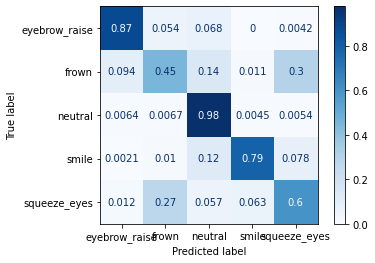

In [107]:
plot_confusion_matrix(estimator=clf_rfB_std, X=X_validB_std, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [108]:
y_pred_rfB_std = clf_rfB_std.predict(X_testB_std)
score_rfB_std = clf_rfB_std.score(X_testB_std, y_testB)
f1_rfB_std = f1_score(y_testB, y_pred_rfB_std, average='macro')
print ('Accuracy: '+str(score_rfB_std*100)+' %')
print ('F1-Score: '+str(f1_rfB_std))

Accuracy: 85.68298027757487 %
F1-Score: 0.7989961254888448


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


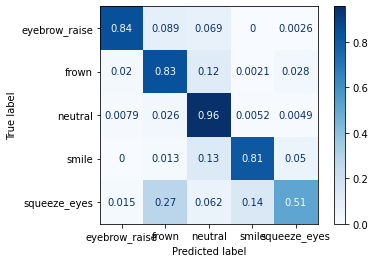

In [109]:
plot_confusion_matrix(estimator=clf_rfB_std, X=X_testB_std, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost - Stadnardization B

In [110]:
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
xgbB_std = XGBClassifier(n_estimators=100)
xgbB_std.fit(X_trainB_std, y_trainXGB_B)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [112]:
y_predXGBB_std = xgbB_std.predict(X_validB_std)
predictionsB_std = [round(value) for value in y_predXGBB_std]
score_xgbB_std = accuracy_score(y_validXGB_B, predictionsB_std)
f1_xgbB_std = f1_score(y_validXGB_B, predictionsB_std, average='macro')
print ('Accuracy: '+str(score_xgbB_std*100)+' %')
print ('F1-Score: '+str(f1_xgbB_std))

Accuracy: 85.2476329206118 %
F1-Score: 0.7619704793978379


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


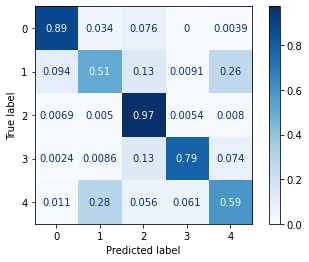

In [113]:
plot_confusion_matrix(estimator=xgbB_std, X=X_validB_std, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [114]:
y_predXGBB_std = xgbB_std.predict(X_testB_std)
predictionsB_std = [round(value) for value in y_predXGBB_std]
score_xgbB_std = accuracy_score(y_testXGB_B, predictionsB_std)
f1_xgbB_std = f1_score(y_testXGB_B, predictionsB_std, average='macro')
print ('Accuracy: '+str(score_xgbB_std*100)+' %')
print ('F1-Score: '+str(f1_xgbB_std))

Accuracy: 86.46092037983931 %
F1-Score: 0.8187186092532246


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


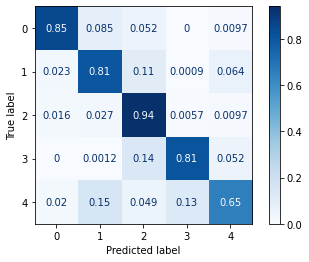

In [115]:
plot_confusion_matrix(estimator=xgbB_std, X=X_testB_std, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

# Normalization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Normalizing the data by subject

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DF_listBnorm = list()

In [117]:
for i in range (0, 30):
    DF_listBnorm.insert (i, DF_listB[i].drop(['event'], axis=1))

In [118]:
for i in range (0, 30):
    DF_listBnorm[i]=scaler.fit_transform(DF_listBnorm[i])
    DF_listBnorm[i]=pd.DataFrame(DF_listBnorm[i], columns=names)

In [119]:
DF_trainB_norm = list()
DF_validB_norm = list()
DF_testB_norm = list()

In [120]:
k=0

for i in training_subjects:
    DF_trainB_norm.insert(k, DF_listBnorm[i-1])
    k=k+1

k=0
    
for i in validation_subjects:
    DF_validB_norm.insert(k, DF_listBnorm[i-1])
    k=k+1
k=0

for i in test_subjects:
    DF_testB_norm.insert(k, DF_listBnorm[i-1])
    k=k+1
   

In [121]:
X_trainB_norm = pd.concat(DF_trainB_norm, ignore_index=True)
X_validB_norm = pd.concat(DF_validB_norm, ignore_index=True)
X_testB_norm = pd.concat (DF_testB_norm, ignore_index=True)

In [122]:
X_testB_norm

,0_iav,0_aac,0_ar1,0_ar2,0_ar3,0_ar4,0_cc1,0_cc2,0_cc3,0_cc4,...,6_wl,6_mnf,6_mdf,6_pkf,6_mnp,6_ttp,6_vcf,6_psr,6_ohm,6_maxx
0,0.016197,0.000000e+00,0.675191,0.335840,0.898088,0.150822,0.324809,0.811147,0.915193,0.071801,...,0.363650,0.290200,0.207469,0.204000,0.000069,0.000069,0.165596,0.165596,0.119964,0.053705
1,0.016197,3.898941e-19,0.675191,0.335840,0.898088,0.150822,0.324809,0.811147,0.915193,0.071801,...,0.371382,0.288056,0.207469,0.204000,0.000069,0.000069,0.168744,0.168744,0.123360,0.053828
2,0.013599,5.981620e-03,0.521468,0.373698,0.801848,0.299323,0.478532,0.773440,0.936693,0.061745,...,0.380529,0.027255,0.008299,0.004000,0.000814,0.000814,0.176868,0.176868,0.688527,0.053821
3,0.010518,1.137793e-02,0.562278,0.324698,0.828525,0.276006,0.437722,0.815849,0.933207,0.063829,...,0.374471,0.026330,0.004149,0.004000,0.001166,0.001166,0.188654,0.188654,0.730641,0.053513
4,0.008347,1.824740e-02,0.510882,0.330608,0.813757,0.266227,0.489118,0.809241,0.936683,0.063620,...,0.380052,0.066568,0.012448,0.004000,0.001330,0.001330,0.226845,0.226845,0.595845,0.051013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27375,0.011125,3.235302e-02,0.575663,0.160150,0.859527,0.080617,0.424337,0.897340,0.987771,0.014187,...,0.494404,0.502350,0.548673,0.270161,0.000255,0.000255,0.508039,0.508039,0.248149,0.011610
27376,0.011437,3.310299e-02,0.593453,0.157707,0.860376,0.076254,0.406547,0.899292,0.987823,0.014418,...,0.501258,0.517699,0.548673,0.197581,0.000246,0.000246,0.504950,0.504950,0.239786,0.011855
27377,0.011607,3.299850e-02,0.562642,0.168048,0.856210,0.090294,0.437358,0.890954,0.987696,0.013673,...,0.498021,0.522728,0.592920,0.197581,0.000235,0.000235,0.480841,0.480841,0.226908,0.012066
27378,0.010866,3.229871e-02,0.593384,0.160269,0.859511,0.082436,0.406616,0.897261,0.987765,0.014090,...,0.497450,0.560473,0.672566,0.197581,0.000233,0.000233,0.499657,0.499657,0.219665,0.012803


## Training the Model

### Random Forest - Normalization B

In [123]:
clf_rfB_norm = RandomForestClassifier(random_state=42)
clf_rfB_norm.fit(X_trainB_norm, y_trainB)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [124]:
y_pred_rfB_norm = clf_rfB_norm.predict(X_validB_norm)
score_rfB_norm = clf_rfB_norm.score(X_validB_norm, y_validB)
f1_rfB_norm = f1_score(y_validB, y_pred_rfB_norm, average='macro')
print ('Accuracy: '+str(score_rfB_norm*100)+' %')
print ('F1-Score: '+str(f1_rfB_norm))

Accuracy: 84.18062636562273 %
F1-Score: 0.7579929051150557


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


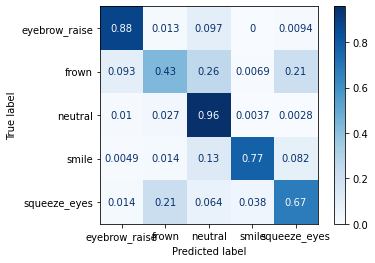

In [125]:
plot_confusion_matrix(estimator=clf_rfB_norm, X=X_validB_norm, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [126]:
y_pred_rfB_norm = clf_rfB_norm.predict(X_testB_norm)
score_rfB_norm = clf_rfB_norm.score(X_testB_norm, y_testB)
f1_rfB_norm = f1_score(y_testB, y_pred_rfB_norm, average='macro')
print ('Accuracy: '+str(score_rfB_norm*100)+' %')
print ('F1-Score: '+str(f1_rfB_norm))

Accuracy: 79.07962016070125 %
F1-Score: 0.719286768767837


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


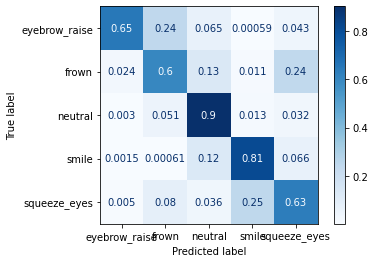

In [127]:
plot_confusion_matrix(estimator=clf_rfB_norm, X=X_testB_norm, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost - Normalization B

In [128]:
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
xgbB_norm = XGBClassifier(n_estimators=100)
xgbB_norm.fit(X_train_norm, y_trainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [130]:
y_predXGBB_norm = xgbB_norm.predict(X_validB_norm)
predictionsB_norm = [round(value) for value in y_predXGBB_norm]
score_xgbB_norm = accuracy_score(y_validXGB_B, predictionsB_norm)
f1_xgbB_norm = f1_score(y_validXGB_B, predictionsB_norm, average='macro')
print ('Accuracy: '+str(score_xgbB_norm*100)+' %')
print ('F1-Score: '+str(f1_xgbB_norm))

Accuracy: 86.03058994901676 %
F1-Score: 0.7770911392986098


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


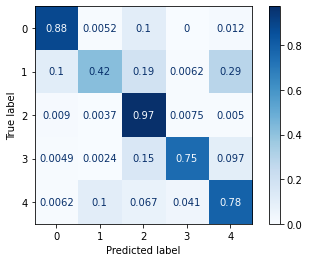

In [131]:
plot_confusion_matrix(estimator=xgbB_norm, X=X_validB_norm, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [132]:
y_predXGBB_norm = xgbB_norm.predict(X_testB_norm)
predictionsB_norm = [round(value) for value in y_predXGBB_norm]
score_xgbB_norm = accuracy_score(y_testXGB_B, predictionsB_norm)
f1_xgbB_norm = f1_score(y_testXGB_B, predictionsB_norm, average='macro')
print ('Accuracy: '+str(score_xgbB_norm*100)+' %')
print ('F1-Score: '+str(f1_xgbB_norm))

Accuracy: 82.65157048940833 %
F1-Score: 0.7569225924833684


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


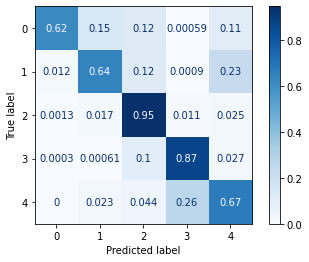

In [133]:
plot_confusion_matrix(estimator=xgbB_norm, X=X_testB_norm, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

# One Sided Selection - Undersampling
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Performing Undersampling

In [134]:
from imblearn.under_sampling import OneSidedSelection

In [135]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [136]:
undersample = OneSidedSelection(n_neighbors=5, n_seeds_S=200)
X_trainB_us, y_trainB_us = undersample.fit_resample(X_train_us, y_train_us)

In [137]:
y_trainB_us.value_counts()

event        
neutral          46939
smile            42374
squeeze_eyes     36044
frown            32412
eyebrow_raise    19117
dtype: int64

## Training the Model

### Decision Tree - OSS

In [138]:
clf_treeB_us = tree.DecisionTreeClassifier()
clf_treeB_us.fit(X_trainB_us, y_trainB_us)

DecisionTreeClassifier()

In [139]:
score_treeB_us = clf_treeB_us.score(X_validB, y_validB)
y_pred_treeB_us = clf_treeB_us.predict(X_validB)
f1_treeB_us=f1_score(y_validB, y_pred_treeB_us, average='macro')
print ('Accuracy: '+str(score_treeB_us*100)+' %')
print ('F1-Score: '+str(f1_treeB_us))

Accuracy: 69.00582665695558 %
F1-Score: 0.5948012675636429


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


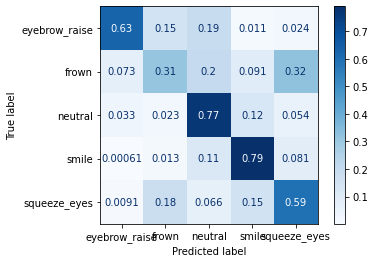

In [140]:
plot_confusion_matrix(estimator=clf_treeB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')


In [141]:
score_treeB_us = clf_treeB_us.score(X_testB, y_testB)
y_pred_treeB_us = clf_treeB_us.predict(X_testB)
f1_treeB_us=f1_score(y_testB, y_pred_treeB_us, average='macro')
print ('Accuracy: '+str(score_treeB_us*100)+' %')
print ('F1-Score: '+str(f1_treeB_us))

Accuracy: 68.52081811541271 %
F1-Score: 0.6215279172950366


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


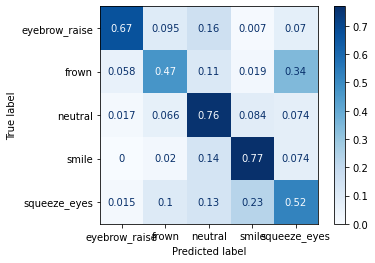

In [142]:
plot_confusion_matrix(estimator=clf_treeB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### Random Forest - OSS

In [143]:
clf_rfB_us = RandomForestClassifier(random_state=42)
clf_rfB_us.fit(X_trainB_us, y_trainB_us)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [144]:
y_pred_rfB_us = clf_rfB_us.predict(X_validB)
score_rfB_us = clf_rfB_us.score(X_validB, y_validB)
f1_rfB_us = f1_score(y_validB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))


Accuracy: 82.98616168973052 %
F1-Score: 0.739842108374837


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


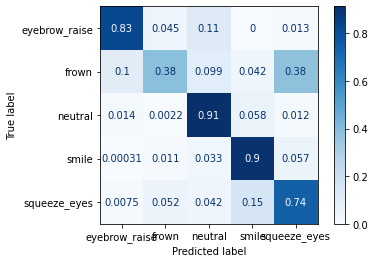

In [145]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [146]:
y_pred_rfB_us = clf_rfB_us.predict(X_testB)
score_rfB_us = clf_rfB_us.score(X_testB, y_testB)
f1_rfB_us = f1_score(y_testB, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 84.1526661796932 %
F1-Score: 0.7768973796716486


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


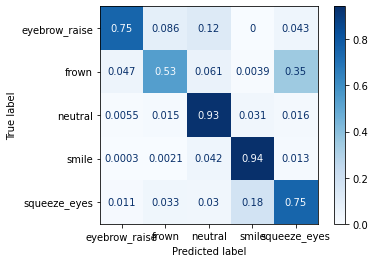

In [147]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost - OSS

In [148]:
y_trainXGB_B_us = le.fit_transform(y_trainB_us)
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
xgbB_us = XGBClassifier(n_estimators=100)
xgbB_us.fit(X_trainB_us, y_trainXGB_B_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [150]:
y_predXGB_B_us = xgbB_us.predict(X_validB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_validXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_validXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))


Accuracy: 82.87691187181355 %
F1-Score: 0.7522971885470554


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


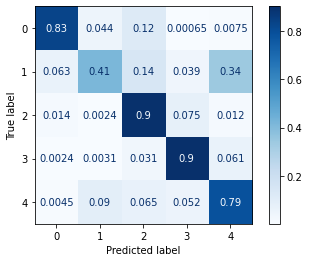

In [151]:
plot_confusion_matrix(estimator=xgbB_us, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [152]:
y_testXGB_B = le.fit_transform(y_testB)
y_predXGB_B_us = xgbB_us.predict(X_testB)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.50620891161432 %
F1-Score: 0.7743218561157581


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


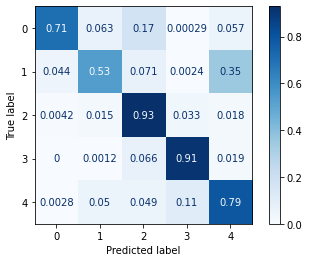

In [153]:
plot_confusion_matrix(estimator=xgbB_us, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

<br>

## Testing on Task A

### XGB

In [154]:
y_testXGB_B = le.fit_transform(y_test)
y_predXGB_B_us = xgbB_us.predict(X_test)
predictions_B_us = [round(value) for value in y_predXGB_B_us]
score_xgb_B_us = accuracy_score(y_testXGB_B, predictions_B_us)
f1_xgb_B_us = f1_score(y_testXGB_B, predictions_B_us, average='macro')
print ('Accuracy: '+str(score_xgb_B_us*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_us))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 84.55709165386584 %
F1-Score: 0.7764920423971713


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


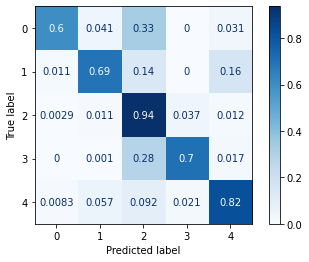

In [155]:
plot_confusion_matrix(estimator=xgbB_us, X=X_test, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

### Random Forest

In [156]:
y_pred_rfB_us = clf_rfB_us.predict(X_test)
score_rfB_us = clf_rfB_us.score(X_test, y_test)
f1_rfB_us = f1_score(y_test, y_pred_rfB_us, average='macro')
print ('Accuracy: '+str(score_rfB_us*100)+' %')
print ('F1-Score: '+str(f1_rfB_us))

Accuracy: 85.96006144393242 %
F1-Score: 0.793890714752277


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


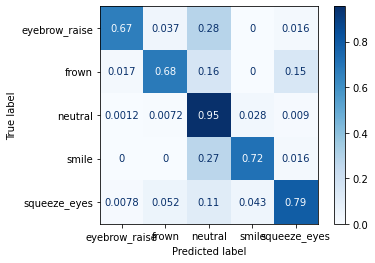

In [157]:
plot_confusion_matrix(estimator=clf_rfB_us, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

# Oversampling
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Performing Oversampling

In [158]:
from imblearn.over_sampling import SMOTE

In [159]:
y_trainB.value_counts()

event        
neutral          56524
smile            13578
squeeze_eyes     13319
frown            13159
eyebrow_raise    13140
dtype: int64

In [160]:
dict_os2 = {
  "eyebrow_raise": 53834,
  "frown": 54230,
  "neutral": 56573 ,
  "smile": 52374 ,
  "squeeze_eyes": 53423 
}

In [161]:
oversample = SMOTE(sampling_strategy=dict_os2, k_neighbors=5)

In [162]:
X_trainB_os, y_trainB_os = oversample.fit_resample(X_trainB, y_trainB)

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (56573) in class neutral will be larger than the number of samples in the majority class (class #neutral -> 56524)
  f"After over-sampling, the number of samples ({n_samples})"


In [163]:
y_trainB_os.value_counts()

event        
neutral          56573
frown            54230
eyebrow_raise    53834
squeeze_eyes     53423
smile            52374
dtype: int64

## Training the Model

### Random Forest - OSS

In [164]:
clf_rfB_os = RandomForestClassifier(random_state=42)
clf_rfB_os.fit(X_trainB_os, y_trainB_os)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [165]:
y_pred_rfB_os = clf_rfB_os.predict(X_validB)
score_rfB_os = clf_rfB_os.score(X_validB, y_validB)
f1_rfB_os = f1_score(y_validB, y_pred_rfB_os, average='macro')
print ('Accuracy: '+str(score_rfB_os*100)+' %')
print ('F1-Score: '+str(f1_rfB_os))


Accuracy: 85.28404952658413 %
F1-Score: 0.7589641133349421


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


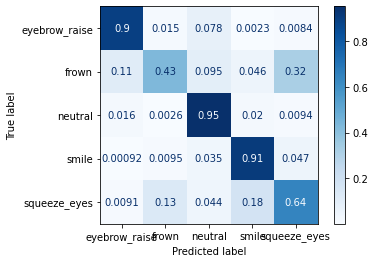

In [166]:
plot_confusion_matrix(estimator=clf_rfB_os, X=X_validB, y_true=y_validB,
                      normalize='true', cmap='Blues')

In [167]:
y_pred_rfB_os = clf_rfB_os.predict(X_testB)
score_rfB_os = clf_rfB_os.score(X_testB, y_testB)
f1_rfB_os = f1_score(y_testB, y_pred_rfB_os, average='macro')
print ('Accuracy: '+str(score_rfB_os*100)+' %')
print ('F1-Score: '+str(f1_rfB_os))

Accuracy: 85.93133674214755 %
F1-Score: 0.7991394985016456


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


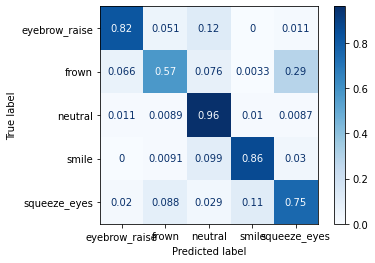

In [168]:
plot_confusion_matrix(estimator=clf_rfB_os, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost - OSS

In [169]:
y_trainXGB_B_os = le.fit_transform(y_trainB_os)
y_trainXGB_B = le.fit_transform(y_trainB)
y_validXGB_B = le.fit_transform(y_validB)
y_testXGB_B = le.fit_transform(y_testB)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
xgbB_os = XGBClassifier(n_estimators=100)
xgbB_os.fit(X_trainB_os, y_trainXGB_B_os)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [171]:
y_predXGB_B_os = xgbB_os.predict(X_validB)
predictions_B_os = [round(value) for value in y_predXGB_B_os]
score_xgb_B_os = accuracy_score(y_validXGB_B, predictions_B_os)
f1_xgb_B_os = f1_score(y_validXGB_B, predictions_B_os, average='macro')
print ('Accuracy: '+str(score_xgb_B_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_os))


Accuracy: 85.05098324836126 %
F1-Score: 0.7628796885844721


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


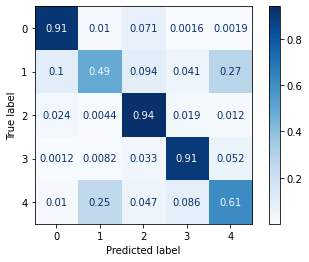

In [172]:
plot_confusion_matrix(estimator=xgbB_os, X=X_validB, y_true=y_validXGB_B,
                      normalize='true', cmap='Blues')

In [173]:
y_predXGB_B_os = xgbB_os.predict(X_testB)
predictions_B_os = [round(value) for value in y_predXGB_B_os]
score_xgb_B_os = accuracy_score(y_testXGB_B, predictions_B_os)
f1_xgb_B_os = f1_score(y_testXGB_B, predictions_B_os, average='macro')
print ('Accuracy: '+str(score_xgb_B_os*100)+' %')
print ('F1-Score: '+str(f1_xgb_B_os))

Accuracy: 86.20160701241782 %
F1-Score: 0.8081857531178993


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


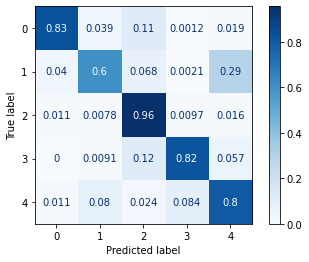

In [174]:
plot_confusion_matrix(estimator=xgbB_os, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')

<br>

# Merged data Training
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Random Forest

In [175]:
clf_rfFull = RandomForestClassifier(random_state=42)
clf_rfFull.fit(X_trainFull, y_trainFull)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [176]:
y_pred_rfFull = clf_rfFull.predict(X_validFull)
score_rfFull = clf_rfFull.score(X_validFull, y_validFull)
f1_rfFull = f1_score(y_validFull, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 85.16896918172158 %
F1-Score: 0.7461181474462967


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


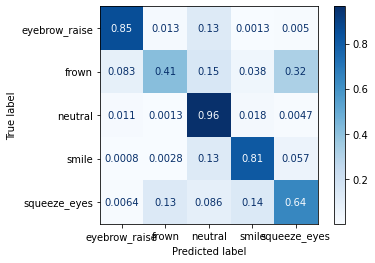

In [177]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_validFull, y_true=y_validFull,
                      normalize='true', cmap='Blues')

In [178]:
y_pred_rfFull = clf_rfFull.predict(X_testFull)
score_rfFull = clf_rfFull.score(X_testFull, y_testFull)
f1_rfFull = f1_score(y_testFull, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 85.09486250266468 %
F1-Score: 0.7829860685133833


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


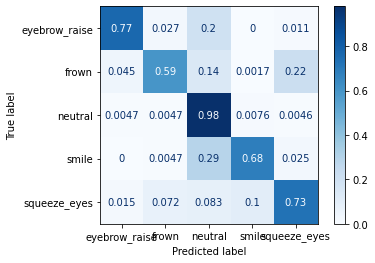

In [179]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_testFull, y_true=y_testFull,
                      normalize='true', cmap='Blues')

### XGBoost

In [180]:
xgbFull = XGBClassifier(n_estimators=100)
le = LabelEncoder()
y_trainXGBFull = le.fit_transform(y_trainFull)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
xgbFull.fit(X_trainFull, y_trainXGBFull)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [182]:
y_validXGBFull = le.fit_transform(y_validFull)

y_predXGBFull = xgbFull.predict(X_validFull)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_validXGBFull, predictionsFull)
f1_xgbFull = f1_score(y_validXGBFull, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

Accuracy: 85.30924548352816 %
F1-Score: 0.757158884083133


In [183]:
y_testXGBFull = le.fit_transform(y_testFull)

y_predXGBFull = xgbFull.predict(X_testFull)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_testXGBFull, predictionsFull)
f1_xgbFull = f1_score(y_testXGBFull, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 85.86442123214665 %
F1-Score: 0.7978317690676759


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


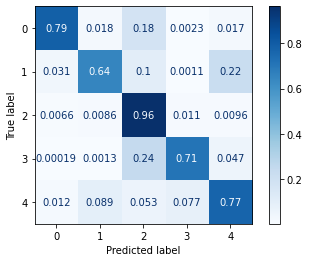

In [184]:
plot_confusion_matrix(estimator=xgbFull, X=X_testFull, y_true=y_testXGBFull,
                      normalize='true', cmap='Blues')

## Testing the model on A

### Random Forest

In [185]:
y_pred_rfFull = clf_rfFull.predict(X_test)
score_rfFull = clf_rfFull.score(X_test, y_test)
f1_rfFull = f1_score(y_test, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 85.47875064004097 %
F1-Score: 0.7834615447559549


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


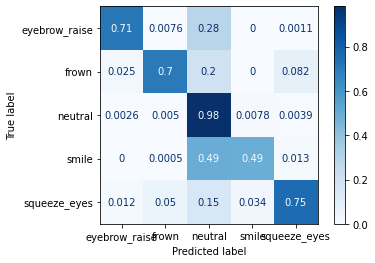

In [186]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

### XGBoost

In [187]:
y_testXGB = le.fit_transform(y_test)

y_predXGBFull = xgbFull.predict(X_test)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_testXGB, predictionsFull)
f1_xgbFull = f1_score(y_testXGB, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 85.66820276497697 %
F1-Score: 0.7838160183815878


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


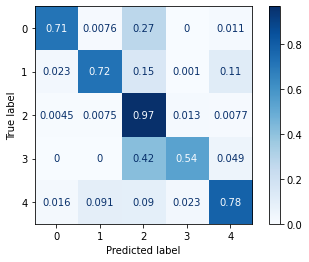

In [188]:
plot_confusion_matrix(estimator=xgbFull, X=X_test, y_true=y_testXGB,
                      normalize='true', cmap='Blues')

## Testing the model on B

### Random Forest

In [189]:
y_pred_rfFull = clf_rfFull.predict(X_testB)
score_rfFull = clf_rfFull.score(X_testB, y_testB)
f1_rfFull = f1_score(y_testB, y_pred_rfFull, average='macro')
print ('Accuracy: '+str(score_rfFull*100)+' %')
print ('F1-Score: '+str(f1_rfFull))

Accuracy: 84.82103725346968 %
F1-Score: 0.7810648147607868


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


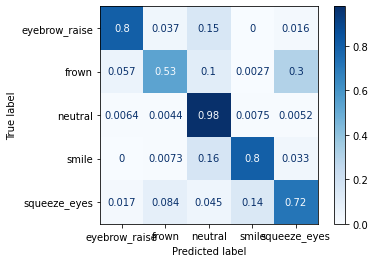

In [190]:
plot_confusion_matrix(estimator=clf_rfFull, X=X_testB, y_true=y_testB,
                      normalize='true', cmap='Blues')

### XGBoost

In [191]:
y_testXGB_B = le.fit_transform(y_testB)

y_predXGBFull = xgbFull.predict(X_testB)
predictionsFull = [round(value) for value in y_predXGBFull]
score_xgbFull = accuracy_score(y_testXGB_B, predictionsFull)
f1_xgbFull = f1_score(y_testXGB_B, predictionsFull, average='macro')
print ('Accuracy: '+str(score_xgbFull*100)+' %')
print ('F1-Score: '+str(f1_xgbFull))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 86.00438276113952 %
F1-Score: 0.8043232307866205


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


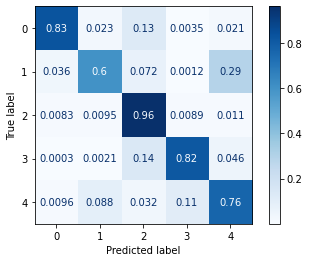

In [192]:
plot_confusion_matrix(estimator=xgbFull, X=X_testB, y_true=y_testXGB_B,
                      normalize='true', cmap='Blues')